In [488]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta
import datetime
from scipy.stats import norm
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [378]:
UMD = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/UMD.csv")
UMD.DATE = pd.to_datetime(UMD.DATE)
UMD.dropna(subset = ["DATE"],inplace=True)
UMD.set_index("DATE",inplace=True)
UMD_USA = UMD[['USA']]

In [379]:
SMB = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/SMB.csv")
SMB.DATE = pd.to_datetime(SMB.DATE)
SMB.dropna(subset = ["DATE"],inplace=True)
SMB.set_index("DATE",inplace=True)
SMB_USA = SMB[['USA']]

In [380]:
HML = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/HML Devil.csv")
HML.DATE = pd.to_datetime(HML.DATE)
HML.dropna(subset = ["DATE"],inplace=True)
HML.set_index("DATE",inplace=True)
HML_USA = HML[['USA']]

In [381]:
MKT = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/MKT.csv")
MKT.DATE = pd.to_datetime(MKT.DATE)
MKT.dropna(subset = ["DATE"],inplace=True)
MKT.set_index("DATE",inplace=True)
MKT_USA = MKT[['USA']]

In [382]:
UMDc = np.log(1+UMD_USA)
UMDi = np.cumsum(UMDc)
SMBc = np.log(1+SMB_USA)
SMBi = np.cumsum(SMBc)
HMLc = np.log(1+HML_USA)
HMLi = np.cumsum(HMLc)
MKTc = np.log(1+MKT_USA)
MKTi = np.cumsum(MKTc)

# Descriptive Statistics of Factor Returns

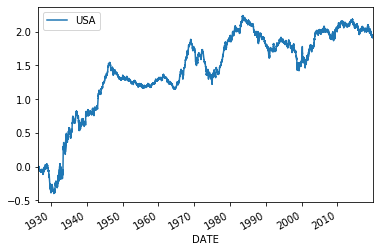

In [383]:
SMBi.plot()

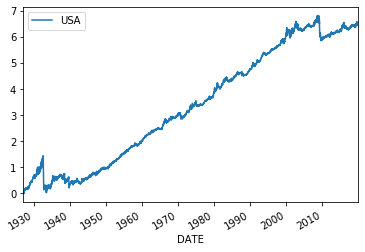

In [384]:
UMDi.plot()

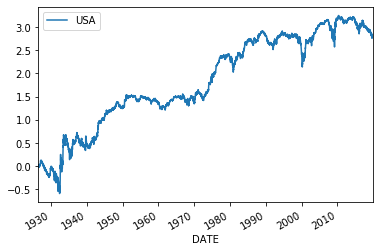

In [385]:
HMLi.plot()

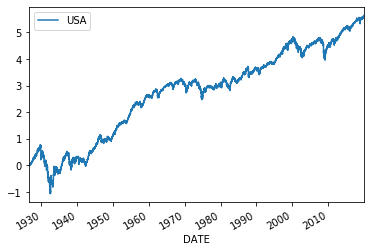

In [386]:
MKTi.plot()

In [387]:
Index = SMBi.copy()
Index['HML'] = HMLi.values
Index['MKT'] = MKTi.values
Index['UMD'] = 0
Index['UMD'][Index.shape[0]-UMDi.shape[0]:Index.shape[0]] = UMDi.iloc[:,0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [388]:
Index.columns = ['SMB','HML','MKT','UMD']

In [389]:
IndexR = Index.diff()

In [390]:
IndexR.dropna(inplace=True)

In [391]:
IndexRY = IndexR.resample("Y").sum()

Text(0.5, 1.0, 'MKT Distribution')

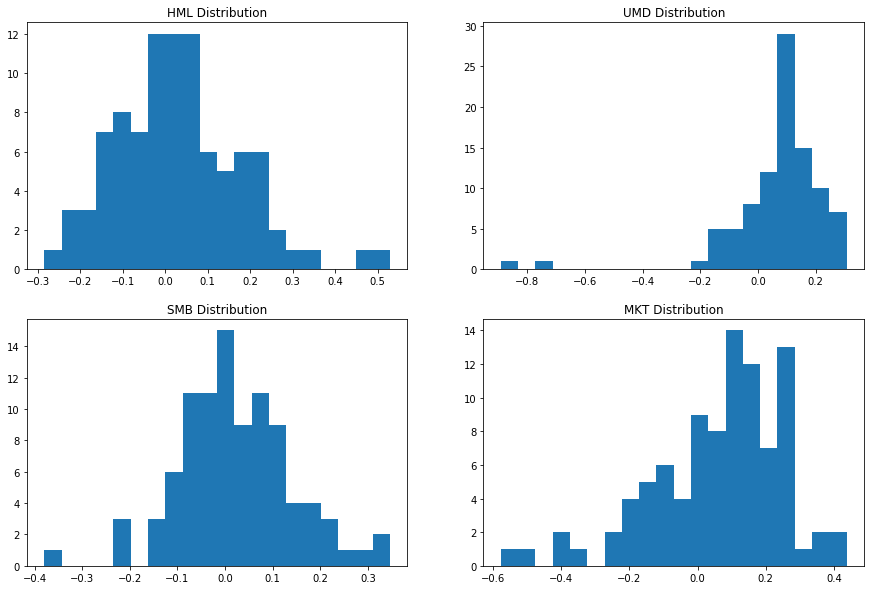

In [392]:
fig, axs = plt.subplots(2, 2,figsize = (15,10))
axs[0,0].hist(IndexRY.HML,20)
axs[0,0].set_title("HML Distribution")
axs[0,1].hist(IndexRY.UMD,20)
axs[0,1].set_title("UMD Distribution")
axs[1,0].hist(IndexRY.SMB,20)
axs[1,0].set_title("SMB Distribution")
axs[1,1].hist(IndexRY.MKT,20)
axs[1,1].set_title("MKT Distribution")

In [393]:
SMB_Bull = IndexRY.index[IndexRY.SMB > np.percentile(IndexRY.SMB,95)].year
SMB_Bear = IndexRY.index[IndexRY.SMB < np.percentile(IndexRY.SMB,5)].year

In [394]:
SMB_Bull = IndexRY.index[IndexRY.SMB > np.percentile(IndexRY.SMB,95)].year
SMB_Bear = IndexRY.index[IndexRY.SMB < np.percentile(IndexRY.SMB,5)].year

# Campbell and Shiller (1998)

In [395]:
IndV = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/IndustryValue.csv")
IndV.public_date = pd.to_datetime(IndV.public_date, format = '%Y%m%d')
IndV.dropna(subset = ["public_date"],inplace=True)

In [396]:
GlobalV = IndV.groupby("public_date").agg("mean")

In [397]:
GlobalV.columns

Index(['dpr_Median', 'PEG_trailing_Median', 'bm_Median', 'CAPEI_Median',
       'evm_Median', 'pcf_Median', 'pe_exi_Median', 'pe_inc_Median',
       'pe_op_basic_Median', 'pe_op_dil_Median', 'ps_Median', 'ptb_Median'],
      dtype='object')

In [398]:
GlobalVN = (GlobalV - np.mean(GlobalV,axis=0))/np.std(GlobalV,axis=0)

In [399]:
GlobalVN

,dpr_Median,PEG_trailing_Median,bm_Median,CAPEI_Median,evm_Median,pcf_Median,pe_exi_Median,pe_inc_Median,pe_op_basic_Median,pe_op_dil_Median,ps_Median,ptb_Median
public_date,,,,,,,,,,,,
1999-06-30,-0.132040,-1.354528,-1.430709,2.013153,0.679144,1.691462,0.333013,0.453833,0.479637,0.738650,0.752461,2.843057
1999-07-31,-0.154768,-1.331661,-1.483689,1.925386,0.707390,1.536162,0.157222,0.311650,0.301895,0.616493,0.638426,2.684541
1999-08-31,-0.247744,-1.048169,-1.898258,1.789889,0.967231,1.363306,-0.034905,0.440886,0.537893,1.098251,0.204975,2.206380
1999-09-30,-0.259107,-1.155761,-1.877066,1.510522,0.931448,0.981461,-0.227700,0.277467,0.281345,0.763051,0.091530,1.602581
1999-10-31,-0.287000,-0.961685,-1.845278,1.846810,1.023642,1.419699,-0.187374,0.340229,0.178672,0.720931,0.401221,1.976880
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-30,-0.076912,-0.467568,-0.505363,0.862826,1.352193,1.518341,0.682120,0.784101,0.952238,0.903040,1.904303,1.074300
2018-10-31,-0.211211,-0.598426,-1.514393,0.470284,1.543909,1.043993,0.434512,0.535205,0.577565,0.534153,1.303188,1.022438
2018-11-30,-0.217785,-0.642135,-1.585435,0.409269,1.584878,1.346492,0.412773,0.444249,0.571465,0.570157,1.438198,1.077863


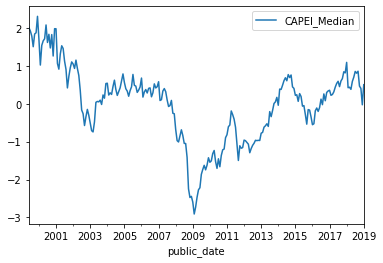

In [400]:
GlobalVN[['CAPEI_Median']].plot()

In [401]:
IndexR_M = IndexR.resample('M').sum()
IndexR_Y = IndexR.resample('Y').sum()

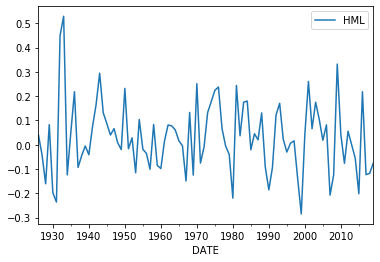

In [402]:
IndexR_Y[['HML']].plot()

In [403]:
Val = pd.merge(GlobalVN[['CAPEI_Median']],IndexR_M,left_on=GlobalVN[['CAPEI_Median']].index,right_on='DATE')
Val.set_index("DATE",inplace=True)

In [404]:
Val

,CAPEI_Median,SMB,HML,MKT,UMD
DATE,,,,,
1999-06-30,2.013153,0.024665,-0.048571,0.045817,0.043531
1999-07-31,1.925386,0.026121,-0.005586,-0.036316,0.021377
1999-08-31,1.789889,-0.020603,-0.016222,-0.014748,0.032259
1999-09-30,1.510522,0.031618,-0.054359,-0.027360,0.059490
1999-10-31,1.846810,-0.067417,-0.047254,0.057503,0.049352
...,...,...,...,...,...
2018-09-30,0.862826,-0.024277,-0.002535,-0.000762,0.001145
2018-10-31,0.470284,-0.032782,0.032681,-0.079794,-0.014451
2018-11-30,0.409269,-0.015930,-0.014412,0.016255,-0.009630


In [603]:
def signalCorr(S,R,title="",n=12):
    ind = ~np.isnan(S)*(~np.isnan(R))
    S = S[ind]
    R = R[ind]
    S = (S-np.mean(S))/np.std(S)
    R = (R-np.mean(R))/np.std(R)
    rw = S.shape[0]
    ans = np.zeros(n-1)
    for i in range(1,n):
        S = S[0:rw-i]
        cumR = np.zeros([S.shape[0]])
        for j in range(len(cumR)):
            cumR[j] = sum(R[j+1:j+i+1])
        ans[i-1] = np.corrcoef(S,cumR)[0,1]
    plt.bar(np.arange(1,12),ans)
    if ans[0]>0:
        plt.axhline(y=2/np.sqrt(S.shape[0]), color='r', linestyle='-')
        plt.title(title)
    else:
        plt.axhline(y=-2/np.sqrt(S.shape[0]), color='r', linestyle='-')
    return ans


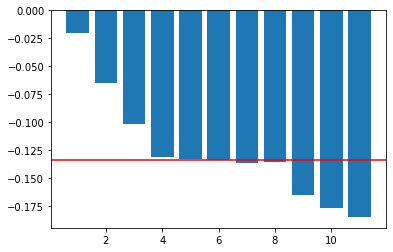

In [604]:
ans = signalCorr(Val['CAPEI_Median'].values,Val['SMB'].values)

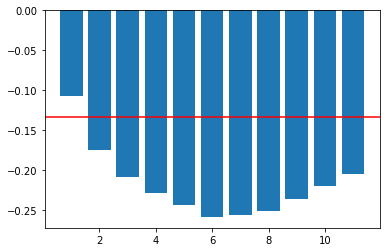

In [605]:
ans = signalCorr(Val['CAPEI_Median'].values,Val['HML'].values)

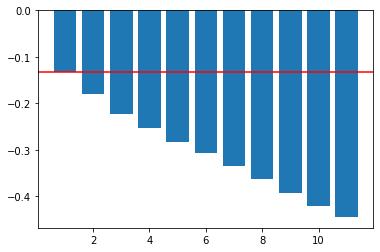

In [606]:
ans = signalCorr(Val['CAPEI_Median'].values,Val['MKT'].values)

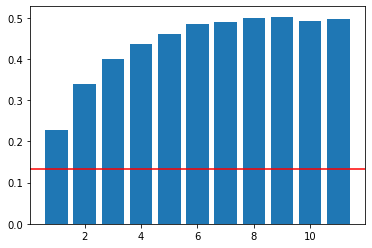

In [409]:
ans = signalCorr(Val['CAPEI_Median'].values,Val['UMD'].values)

# Macro Indicators

In [410]:
Quat = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/QuarterlyData.csv")
Quat.Date = pd.to_datetime(Quat.Date)
Quat.set_index("Date",inplace=True)

In [411]:
Mon = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/MonthlyData.csv")
Mon.Date = pd.to_datetime(Mon.Date)
Mon.set_index("Date",inplace=True)

In [412]:
Day = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/DailyData.csv")
Day.Date = pd.to_datetime(Day.Date)
Day.set_index("Date",inplace=True)

In [413]:
GDP = pd.read_csv("C:/Users/Leo/Desktop/AFP/Data/US GDP.csv")
GDP.DATE = pd.to_datetime(GDP.DATE)
GDP.set_index("DATE",inplace=True)

In [613]:
def plot4charts(indicator):
    ans = signalCorr(indicator,Val2['SMB'].values,"SMB")
    plt.show()
    ans = signalCorr(indicator,Val2['UMD'].values,"UMD")
    plt.show()
    ans = signalCorr(indicator,Val2['HML'].values,"HML")
    plt.show()
    ans = signalCorr(indicator,Val2['MKT'].values,"MKT")
    plt.show()

    

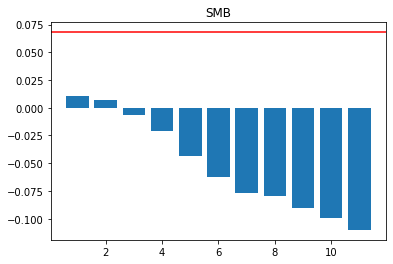

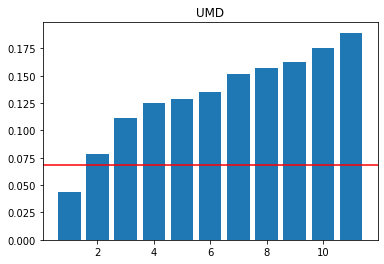

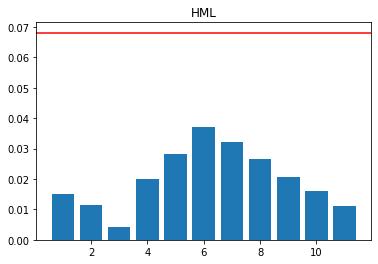

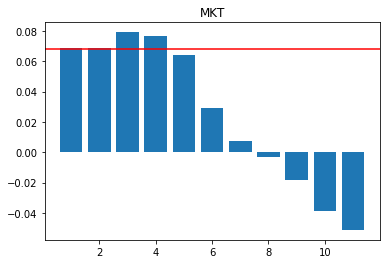

In [616]:
plot4charts(Val2['GDP'].values)

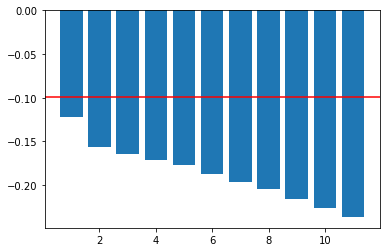

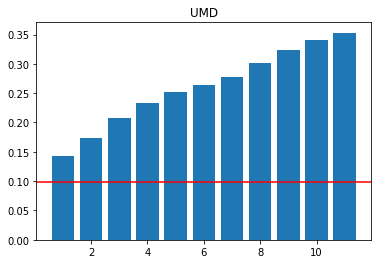

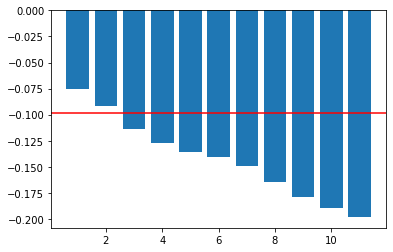

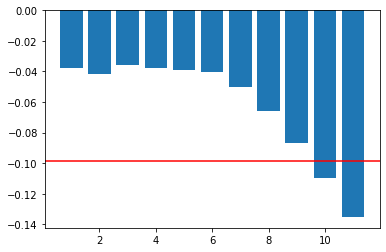

In [618]:
plot4charts(Val2['ConsumerSentiment'].values)

In [415]:
Val2 = pd.merge(Quat,IndexR_M,left_on=Quat.index,right_on='DATE',how = 'right').sort_values(by='DATE', ascending=True)

In [416]:
Val2.set_index("DATE",inplace=True)

In [417]:
#Val2 = pd.merge(Val2,GDP,left_on=Val2.index,right_on='DATE',how = 'right').sort_values(by='DATE', ascending=True)

In [418]:
#Val2.set_index("DATE",inplace=True)

In [419]:
Val2.ffill(axis=0,inplace=True)

In [420]:
Val2 = pd.merge(Mon,Val2,left_on=Mon.index,right_on='DATE',how = 'right').sort_values(by='DATE', ascending=True)

In [421]:
DayM = Day.resample("M").mean()

In [422]:
Val2 = pd.merge(DayM,Val2,left_on=DayM.index,right_on='DATE',how = 'right').sort_values(by='DATE', ascending=True)

In [423]:
Val2.set_index("DATE",inplace=True)

In [424]:
Val2.describe()

,Policy Rates,One Year YC,Trend restored,Real GDP,Corporate Spread,3MTed,ConsumerSentiment,VIX,PMI,CPI,GDP,SMB,HML,MKT,UMD
count,239.000000,173.000000,239.000000,239.000000,208.000000,421.000000,421.000000,349.000000,421.00000,421.000000,874.000000,1122.000000,1122.000000,1122.000000,1122.000000
mean,1.771202,0.064536,90.875746,2.244770,1.920288,4.005137,87.833017,19.941948,52.29715,2.776722,3.254348,0.001728,0.002512,0.005016,0.005757
std,1.906099,0.254503,9.873866,6.548183,0.851103,2.926275,12.461813,8.489720,4.58893,1.433072,3.806426,0.029224,0.040027,0.052651,0.049345
min,0.125000,-0.508839,74.188000,-18.300000,1.180000,0.230600,56.400000,11.180000,34.50000,-1.400000,-10.000000,-0.141617,-0.197164,-0.331690,-0.655031
25%,0.125000,-0.123794,84.537750,-1.700000,1.420000,1.160000,80.400000,13.290000,50.10000,1.700000,1.200000,-0.014322,-0.016822,-0.020631,-0.009093
50%,1.125000,0.070603,89.797900,2.200000,1.685000,4.052500,91.200000,18.020000,52.40000,2.900000,3.200000,-0.000012,-0.000382,0.009754,0.008852
75%,2.375000,0.269481,98.923250,6.200000,2.140000,6.083750,95.100000,23.950000,55.50000,3.900000,5.000000,0.016423,0.016714,0.035594,0.027803
max,6.500000,0.574783,109.905600,22.900000,5.750000,10.312500,107.300000,44.140000,61.00000,6.100000,16.700000,0.309461,0.407740,0.317264,0.158093


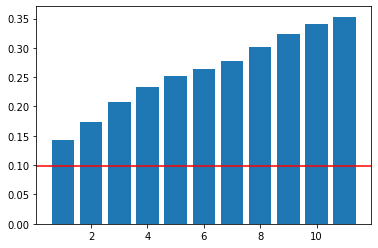

In [459]:
ans = signalCorr(Val2['ConsumerSentiment'].values,Val2['UMD'].values)

In [483]:
def score(lookback,index):
    score = np.repeat(np.nan,index.shape[0])
    
    for i in range(len(index)-lookback+1):
        data = index[i:i+lookback]
        #print(data)
        data = (data - np.mean(data))/np.std(data)
        score[i+lookback-1] = norm.cdf(data[-1])
    return score

# Economic conditions

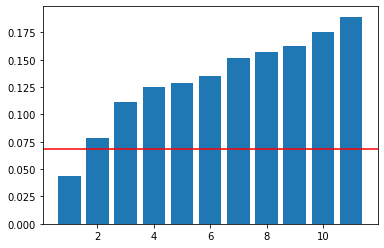

In [601]:
ans = signalCorr(Val2['GDP'].values,Val2['UMD'].values)


In [ ]:
ans = signalCorr(Val2['GDP'].values,Val2['UMD'].values)

# Backtesting

In [588]:
def myOLS(Y,X):
    data = np.c_[Y,X]
    ind = np.all(~np.isnan(data),axis=1)
    #print(ind)
    X = X[ind]
    Y = Y[ind]
    #print(X)
    X = sm.add_constant(X)
    res = sm.OLS(Y, X).fit(cov='HC3')
    #print(res.summary())
    return res

In [ ]:
def 

In [594]:
res = myOLS(Val2['UMD'][1:].values,Val2['ConsumerSentiment'][:-1])
?res

In [599]:
yhat = res.params[0]+res.params[1]*Val2['ConsumerSentiment']